## Data Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
path = os.path.join("Data","Admission_Predict.csv")
ga_df = pd.read_csv(path)
print("Data is imported!")

Data is imported!


In [7]:
ga_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data shape

In [8]:
ga_df.shape

(500, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a253b57b8>]],
      dtype=object)

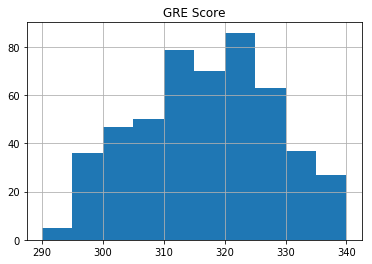

In [9]:
ga_df.hist('GRE Score')

In [3]:
#Test Train Split
from sklearn.model_selection import train_test_split